In [16]:
import os
from os import listdir,makedirs
from os.path import isfile,join
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf
import keras.backend as K
import keras
from keras.models import Sequential
import cv2



In [2]:
'''
Hyper-Parameters
'''
image_H = 96
image_W = 96
grayscale = True
batch_size = 16
learning_rate=0.001
momentum = 0
decay = 0
epochs = 100
droupout= 0.1
gradient_clipping = 0.1
nFilters = 128
nlandmarks = nLabels = 68
K=45
img_rows = 96
img_cols = 96
img_channels = 1

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(sess)


In [3]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ibug.zip to ibug.zip
User uploaded file "ibug.zip" with length 32805658 bytes


In [230]:
#files.os.listdir()
!ls
#!rm ibug" ""("3")".zip
#!rm ibug.zip
#!ls

datalab       folderibug11  folderibug2  folderibug6  ibug.zip
folderibug    folderibug12  folderibug3  folderibug7  image_003_1.jpg
folderibug1   folderibug13  folderibug4  folderibug8
folderibug10  folderibug14  folderibug5  folderibug9


In [231]:
#to extract ziped folder to unzipped folder named folderibug

import zipfile
path ="ibug.zip"
directory ="folderibug"
zip_ref = zipfile.ZipFile(path, 'r')
print(zip_ref)
zip_ref.extractall(directory)
print(zip_ref)
zip_ref.close()
!ls

<zipfile.ZipFile filename='ibug.zip' mode='r'>
<zipfile.ZipFile filename='ibug.zip' mode='r'>
datalab       folderibug11  folderibug2  folderibug6  ibug.zip
folderibug    folderibug12  folderibug3  folderibug7  image_003_1.jpg
folderibug1   folderibug13  folderibug4  folderibug8
folderibug10  folderibug14  folderibug5  folderibug9


In [269]:
# To convert images in folderibug to grayscale images - folder name - GrayFolder

path = directory
dstpath = "GrayFolder"
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 

for image in files:
 
    try:
        if image.endswith('.jpg'):
          img = cv2.imread(os.path.join(path,image))
          gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
          dstPath = join(dstpath,image)
          cv2.imwrite(dstPath,gray)
         
    except:
        print ("{} is not converted".format(image))
        

Directory already exist, images will be written in asme folder


In [272]:
#To load images using cv2, the output wil be list of images which are then converted to numpy array

def load_images_from_folder(folder):
    images = []
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        
    return images


# your images in a list
imgs = load_images_from_folder(dstpath)
#print(imgs)
#print(type(imgs))
#images to array
images = np.asarray(imgs)
print(len(images))

print(type(images))


135
<class 'numpy.ndarray'>


<class 'list'>


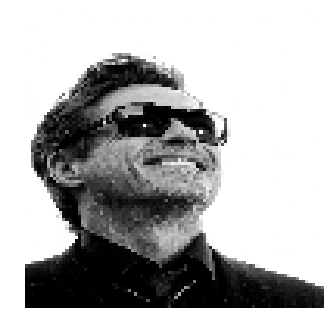

135
(135, 96, 96, 3)


In [283]:
# Pre-processing - resize of images to 96x96
image_Grayscale = []
images_resized = []
for img in images:
  #print(type(images))
  resized = cv2.resize(img,(96,96))
  #print(type(resized))
  images_resized.append(resized)

print(type(images_resized))
plt.imshow(images_resized[134],cmap= "gray"), plt.axis("off")
plt.show()
print(len(images_resized))
#print(images_resized.shape)
Fimages = np.asarray(images_resized)
print(Fimages.shape)

In [0]:
train_x = []
train_y = []
test_x = []
test_y = []

In [292]:
print(type(images))
print(len(images))
print(images.shape)
print(type(images_resized))
print(len(images_resized))
print(images_resized.count)

# Splitting training and testing data (80:20 used index value to split)

train_x = []
train_y = []

from itertools import chain
train_x = list(chain(images_resized[0:107]))
print(type(train_x))
print(len(train_x))
train_y = list(chain(images_resized[108:len(images_resized)]))
print(type(train_y))
print(len(train_y))

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

train_x = train_x.astype('float32')
train_x = train_x / 255.0

train_y = train_y.astype('float32')
train_y = train_y / 255.0

<class 'numpy.ndarray'>
135
(135,)
<class 'list'>
135
<built-in method count of list object at 0x7f8621f2ce08>
<class 'list'>
107
<class 'list'>
27


In [4]:
input_shape = (img_cols, img_rows, img_channels)
model = Sequential()

In [36]:
from keras.layers import Dense, Dropout, Activation, Add
from keras.layers import Convolution2D, Lambda
from keras.layers.normalization import BatchNormalization

def apply_kernel(local_out):
    '''
     get kernel from text file
     tile it to 1x1x45x45
     convolve with local out
    '''
    f = open(r'C:\Users\Meers\Documents\Techie\InkersIntern\Phase2\Merget\Merget\network\config\kernel45.txt')
    kernel45 = np.fromfile(f, dtype = np.float32, count = -1, sep = " ")
    # [1 x 1 x 45 x 45]
    kernel45 = np.reshape(kernel45, (45, 45, 1, 1))
    # [numLabels x 1 x 45 x 45] if tensor convolution is used
    kernel_stacked 	= np.tile(kernel45, (1, 1, nLabels,1))
    #heatmaps = Convolution2D(local_out, kernel_stacked)
    kernel_tensor = tf.convert_to_tensor(kernel_stacked, dtype=tf.float32)
    print(local_out)
    print(kernel_tensor)
    return tf.nn.conv2d(local_out, kernel_tensor, strides=[1,1,1,1], padding="VALID")
    #return heatmaps

    '''
    local_subnet_np = local_out.eval 
    heatmaps = []
    for landmark in local_subnet_np:
        heatmaps.append(cv2.filter2D(landmark,-1,kernel45))
    return tf.convert_to_tensor(heatmaps, dtype=tf.float32)
    '''

'''
LOCAL SUBNET
'''

# [ImageC x ImageH x ImageW]
model.add(Convolution2D(filters=nFilters, kernel_size=(5, 5), padding='same', activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(5, 5),  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(5, 5),  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

'''
1x1 Convolution with activation
'''
Conv1x1 = Convolution2D(filters=nLabels, kernel_size=(1, 1),activation='relu')(model.output)
Conv1x1xK = Lambda(apply_kernel, output_shape=(nLabels, img_cols, img_rows))(Conv1x1)

'''
Ol 1x1 Linear convolution
Apply Gaussian Kernel filter
'''
Ol = Convolution2D(filters=nLabels, kernel_size=(1, 1),activation=None)(model.output)
# What about tiling the kernels????
OlxK = Lambda(apply_kernel, output_shape=(nLabels, img_cols, img_rows))(Ol)

output = keras.layers.concatenate([Conv1x1xK, OlxK])

'''
GLOBAL SUBNET
'''
global_net = Sequential()
global_net.add(Convolution2D(filters=nFilters, kernel_size=(3, 3),  padding='same', dilation_rate = 4, activation='relu', input_shape = (img_cols, img_rows, img_channels)))
model.add(BatchNormalization())
global_net.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', dilation_rate = 4, activation='relu'))
model.add(BatchNormalization())
global_net.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', dilation_rate = 4, activation='relu'))
model.add(BatchNormalization())
global_net.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', dilation_rate = 4, activation='relu'))
model.add(BatchNormalization())
global_net.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', dilation_rate = 4, activation='relu'))
model.add(BatchNormalization())
global_net.add(Convolution2D(filters=nFilters, kernel_size=(3, 3),  padding='same', dilation_rate = 4, activation='relu'))
model.add(BatchNormalization())
global_net.add(Convolution2D(filters=nFilters, kernel_size=(3, 3), padding='same', dilation_rate = 4, activation='relu'))
model.add(BatchNormalization())

model.summary()

Tensor("conv2d_531/Relu:0", shape=(?, 96, 96, 68), dtype=float32)
Tensor("lambda_26/Const:0", shape=(45, 45, 68, 1), dtype=float32)
Tensor("conv2d_532/BiasAdd:0", shape=(?, 96, 96, 68), dtype=float32)
Tensor("lambda_27/Const:0", shape=(45, 45, 68, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 128)       3328      
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 128)       512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 128)       409728    
_______

batch_normalization_146 (Bat (None, 96, 96, 128)       512       
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 96, 96, 128)       147584    
_________________________________________________________________
batch_normalization_147 (Bat (None, 96, 96, 128)       512       
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 96, 96, 128)       147584    
_________________________________________________________________
batch_normalization_148 (Bat (None, 96, 96, 128)       512       
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 96, 96, 128)       147584    
_________________________________________________________________
batch_normalization_149 (Bat (None, 96, 96, 128)       512       
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 96, 96, 128)       147584    
__________

* Loss Function: Weighted Square Error
* Exclude non-labeled landmarks from the loss
* Weight each of N landmarks depending on whether they lie within the image boundary:
\begin{equation*}
wij = V (i,j) + \frac{L(i,j)}{10} + \frac{L(i,j)}{2N}\sum_{k=1}^N V (i,k),       \\[1pt]
\text{    where V (i; j) and L(i; j) are indicator functions with L(i; j) = 1 iff landmark j in face i is labeled}    \\[1pt]
\text {V (i; j) = 1 iff landmark j in face i is within the image boundary, zero otherwise.    }\\[1pt]
\text{Note that L(i; j) = 0 implies V (i; j) = 0.}\end{equation*}

\begin{equation*}
e_i = \sum_{n=1}^N w_{in}(((O^l_n - G_n) * K)^2 + (O^g_n - G_n * K)^2), \\[2pt]
\text{    where    } \\[2pt]
O^l_n    and    O^g_n = \text{nth channels of the local- and global context subnet outputs, respectively.} \\[1pt]
\text{K = kernel }   \\[1pt]
\text{Gn = ground truth heatmap for landmark n }   \\[1pt]
\text{For efficiency, the kernel convolution after stacking is reused for the loss}
\end{equation*}


In [ ]:
import tensorflow as tf

def landmark_weight(labels):
    #[numLabels x 1 x 1]
    Win = tf.reduce(labels)
    Win = Win * 0.5
    return Win

'''
Ol, Og - [numLabels x ImageH x ImageW]
Gn - Groundtruth heatmaps with Kernel applied
labels and ground truth heatmaps are different???
'''
def loss_function(Ol, Og, Kernel, Gn, labels):
    
    ground_K = []
    Win = landmark_weight(labels)

    # Gn x K
    for landmark in Gn:
        ground_K.append(cv2.filter2D(landmark,-1,Kernel))
    # Og - Gn x K
    global_diff = Og - ground_K
    global_err = tf.square(Og - ground_K)
    
    # (Ol - Gn) x K
    local_diff = Ol - Gn
    local_err = tf.square(cv2.filter2D(local_diff,-1,Kernel))
    
    comb_err = local_err + global_err
    
    wt_square_err = tf.reduce_sum(Win * comb_err)
    return wt_square_err
